# Polynomial Regression

What if your data doesn't look linear at all? Let's look at some more realistic-looking page speed / purchase data:

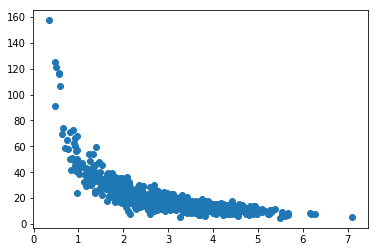

In [1]:
%matplotlib inline
from pylab import *
import numpy as np

np.random.seed(2)
pageSpeeds = np.random.normal(3.0, 1.0, 1000)
purchaseAmount = np.random.normal(50.0, 10.0, 1000) / pageSpeeds

scatter(pageSpeeds, purchaseAmount)

numpy has a handy polyfit function we can use, to let us construct an nth-degree polynomial model of our data that minimizes squared error. Let's try it with a 4th degree polynomial:

In [2]:
x = np.array(pageSpeeds)
y = np.array(purchaseAmount)

p4 = np.poly1d(np.polyfit(x, y, 4))


We'll visualize our original scatter plot, together with a plot of our predicted values using the polynomial for page speed times ranging from 0-7 seconds:

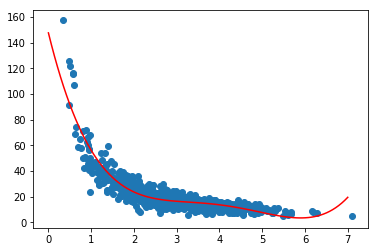

In [3]:
import matplotlib.pyplot as plt

xp = np.linspace(0, 7, 100)
plt.scatter(x, y)
plt.plot(xp, p4(xp), c='r')
plt.show()

Looks pretty good! Let's measure the r-squared error:

In [4]:
from sklearn.metrics import r2_score

r2 = r2_score(y, p4(x))

print(r2)


0.8293766396303073


## Activity

Try different polynomial orders. Can you get a better fit with higher orders? Do you start to see overfitting, even though the r-squared score looks good for this particular data set?

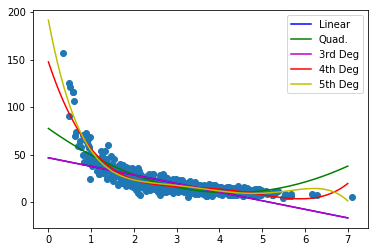

Linear:  0.5024941304548026
Quad:  0.6927446350535893
3rd Deg:  0.7842354030823269
4th Deg:  0.8293766396303073
5th Deg:  0.8553884386186101


In [7]:
p1 = np.poly1d(np.polyfit(x, y, 1))
p2 = np.poly1d(np.polyfit(x, y, 2))
p3 = np.poly1d(np.polyfit(x, y, 3))
p5 = np.poly1d(np.polyfit(x, y, 5))

plt.scatter(x, y)
plt.plot(xp,p1(xp), c='b',label='Linear')
plt.plot(xp,p2(xp), c='g',label='Quad.')
plt.plot(xp,p1(xp), c='m',label='3rd Deg')
plt.plot(xp, p4(xp), c='r',label='4th Deg')
plt.plot(xp, p5(xp), c='y',label='5th Deg')
plt.legend()
plt.show()
r2 = r2_score(y, p1(x))
print("Linear: ",r2)
r2 = r2_score(y, p2(x))
print("Quad: ",r2)
r2 = r2_score(y, p3(x))
print("3rd Deg: ",r2)
r2 = r2_score(y, p4(x))
print("4th Deg: ",r2)
r2 = r2_score(y, p5(x))
print("5th Deg: ",r2)